In [2]:
import re
import matplotlib.pyplot as plt

In [3]:
def parse_log_file(file_path):
    """
    Phân tích file log để trích xuất dữ liệu về epoch, training accuracy,
    validation accuracy (top-1) và best top-1 accuracy.

    Args:
        file_path (str): Đường dẫn đến file log.

    Returns:
        tuple: Một tuple chứa các danh sách:
               - train_epochs (list): Danh sách các epoch có training accuracy.
               - train_accuracies (list): Danh sách các giá trị training accuracy.
               - eval_epochs (list): Danh sách các epoch có validation accuracy.
               - eval_accuracies (list): Danh sách các giá trị validation accuracy (top-1).
               - best_epochs (list): Danh sách các epoch có best top-1 accuracy.
               - best_accuracies (list): Danh sách các giá trị best top-1 accuracy.
    """
    train_epochs = []
    train_accuracies = []
    eval_epochs = []
    eval_accuracies = []
    best_epochs = []
    best_accuracies = []

    # Biểu thức chính quy để trích xuất thông tin
    epoch_train_pattern = re.compile(r"Epoch: (\d+)/\d+, Training accuracy: .*?\((\d+\.\d+)%\)")
    epoch_eval_pattern = re.compile(r"Evaluating for epoch (\d+)/\d+ \.\.\.")
    eval_acc_pattern = re.compile(r"Top-1 accuracy: .*?\((\d+\.\d+)%\)")
    best_acc_pattern = re.compile(r"Best top-1 accuracy: (\d+\.\d+)%")

    current_eval_epoch = None

    with open(file_path, 'r') as f:
        for line in f:
            # Tìm training accuracy
            train_match = epoch_train_pattern.search(line)
            if train_match:
                epoch = int(train_match.group(1))
                accuracy = float(train_match.group(2))
                train_epochs.append(epoch)
                train_accuracies.append(accuracy)
                # Lấy epoch từ dòng training để sử dụng cho best accuracy
                current_train_epoch = epoch

            # Tìm dòng bắt đầu evaluation để lấy số epoch
            eval_epoch_match = epoch_eval_pattern.search(line)
            if eval_epoch_match:
                current_eval_epoch = int(eval_epoch_match.group(1))

            # Tìm validation accuracy (top-1)
            eval_acc_match = eval_acc_pattern.search(line)
            if eval_acc_match and current_eval_epoch is not None:
                accuracy = float(eval_acc_match.group(1))
                eval_epochs.append(current_eval_epoch)
                eval_accuracies.append(accuracy)
                current_eval_epoch = None # Reset sau khi sử dụng

            # Tìm best top-1 accuracy
            best_acc_match = best_acc_pattern.search(line)
            if best_acc_match and current_train_epoch is not None:
                 accuracy = float(best_acc_match.group(1))
                 # Chỉ thêm nếu epoch chưa có trong danh sách hoặc giá trị thay đổi
                 if not best_epochs or best_epochs[-1] != current_train_epoch:
                    best_epochs.append(current_train_epoch)
                    best_accuracies.append(accuracy)


    return train_epochs, train_accuracies, eval_epochs, eval_accuracies, best_epochs, best_accuracies

In [4]:
def plot_accuracy_chart(train_epochs, train_accuracies, eval_epochs, eval_accuracies, best_epochs, best_accuracies):
    """
    Vẽ biểu đồ thể hiện sự tăng trưởng của accuracy.

    Args:
        train_epochs (list): Danh sách các epoch của training.
        train_accuracies (list): Danh sách các giá trị training accuracy.
        eval_epochs (list): Danh sách các epoch của evaluation.
        eval_accuracies (list): Danh sách các giá trị validation accuracy.
        best_epochs (list): Danh sách các epoch của best accuracy.
        best_accuracies (list): Danh sách các giá trị best accuracy.
    """
    plt.style.use('seaborn-v0_8-whitegrid') # Sử dụng style cho biểu đồ đẹp hơn
    plt.figure(figsize=(14, 8))

    # Vẽ các đường dữ liệu
    plt.plot(train_epochs, train_accuracies, marker='o', linestyle='-', label='Training Accuracy', markersize=5)
    plt.plot(eval_epochs, eval_accuracies, marker='s', linestyle='--', label='Validation Accuracy (Top-1)', markersize=7)
    plt.plot(best_epochs, best_accuracies, marker='*', linestyle=':', color='green', label='Best Top-1 Accuracy', markersize=8)

    # Đặt tiêu đề và nhãn cho các trục
    plt.title('Sự tăng trưởng của Accuracy qua các Epoch', fontsize=16)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Accuracy (%)', fontsize=12)

    # Hiển thị chú thích
    plt.legend(fontsize=10)

    # Hiển thị lưới
    plt.grid(True)

    # Đặt giới hạn cho các trục để dễ nhìn hơn
    plt.xlim(left=0)
    plt.ylim(bottom=0, top=105) # Giới hạn trục Y từ 0 đến 105%

    # Hiển thị biểu đồ
    plt.tight_layout() # Tự động điều chỉnh các tham số để vừa vặn
    plt.show()


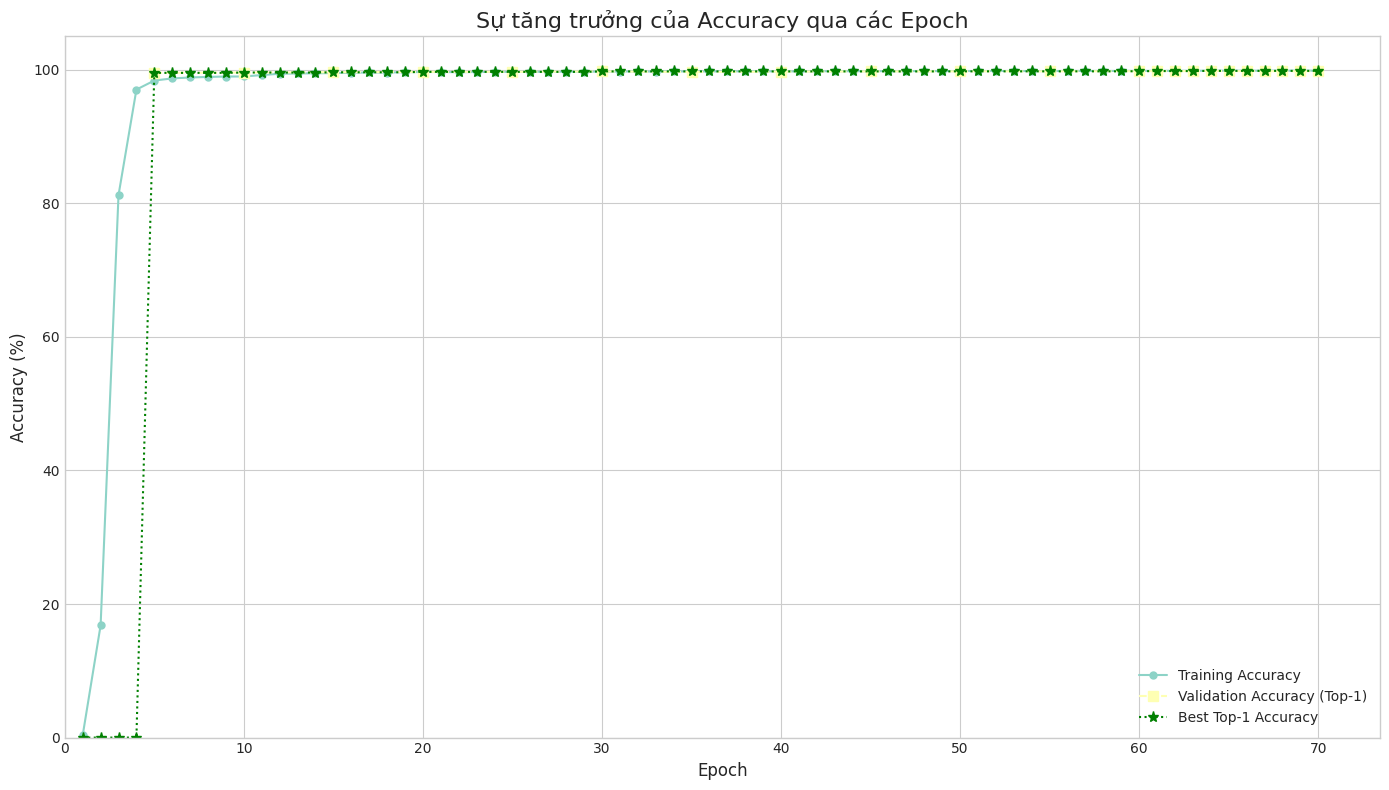

In [5]:
log_file = '/workspace/workdir/2004_liem_chinh_khoa_hoc_EfficientGCN-B0_mediapipe61/2025-06-28 15-21-27/log.txt'
try:
    data = parse_log_file(log_file)
    plot_accuracy_chart(*data)
except FileNotFoundError:
    print(f"Lỗi: Không tìm thấy file '{log_file}'. Vui lòng đảm bảo file log nằm trong cùng thư mục hoặc cung cấp đường dẫn chính xác.")
except Exception as e:
    print(f"Đã xảy ra lỗi: {e}")

In [ ]:
from collections import defaultdict

def count_character(word):
    # Khởi tạo defaultdict với giá trị mặc định là 0
    character_statistic = defaultdict(int)
    
    # Lặp qua từng ký tự trong chuỗi `word`
    for character in word:
        if character.isalpha():
            # Không cần kiểm tra tồn tại
            character_statistic[character] += 1  
    
    # Trả về dictionary thông thường nếu không muốn trả defaultdict
    return dict(character_statistic)

word = "hello world"
character_statistic = count_character(word)
print(f"Thống kê ký tự trong chuỗi '{word}': {character_statistic}")

Thống kê ký tự trong chuỗi 'hello world': {'h': 1, 'e': 1, 'l': 3, 'o': 2, ' ': 1, 'w': 1, 'r': 1, 'd': 1}


In [5]:
!gdown https://drive.google.com/uc?id=1IBScGdW2xLNsc9v5zSAya548kNgjOrko

Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1IBScGdW2xLNsc9v5zSAya548kNgjOrko

but Gdown can't. Please check connections and permissions.


In [ ]:
from collections import defaultdict

def preprocess_text(sentence):

    sentence = sentence.lower()
    sentence = sentence.replace('.', '').replace(',', '')
    words = sentence.split()
    return words

def count_words(sentences):
    """
    Hàm đếm số lần xuất hiện của từng từ trong danh sách các câu.
    
    Input: 
        - sentences: danh sách các câu (list of strings)
        
    Output: 
        - counter: dictionary (defaultdict) với key là từ, value là số lần xuất hiện
    """
    counter = defaultdict(int)
    
    for sentence in sentences:
        words = preprocess_text(sentence)
        for word in words:
            counter[word] += 1
    
    return counter

sentences = [   
    "Hôm nay trời đẹp.",
    "Trời hôm nay rất đẹp.",
    "Trời hôm nay đẹp quá.",
    "Hôm nay là một ngày đẹp trời.",
]

In [1]:
import csv

# Đặt tên cho file input và output
input_csv_file = '/workspace/data/log/processing_log_single_thread_v2.csv'
output_txt_file = 'vocabulary.txt'

# Tạo một set để chứa các label duy nhất, tránh trùng lặp
vocabulary = set()

try:
    # Mở file CSV để đọc với encoding utf-8
    with open(input_csv_file, mode='r', newline='', encoding='utf-8') as csv_file:
        # Đọc file CSV
        csv_reader = csv.reader(csv_file)
        
        # Bỏ qua dòng tiêu đề (header)
        next(csv_reader)
        
        # Duyệt qua từng dòng trong file CSV
        for row in csv_reader:
            # Kiểm tra xem dòng có đủ 3 cột và status có phải là 'PROCESSED_SUCCESSFULLY'
            if len(row) == 3 and row[1] == 'PROCESSED_SUCCESSFULLY':
                # Lấy label từ cột thứ 3 (chỉ số 2)
                label = row[2]
                # Thêm label vào set
                vocabulary.add(label)

    # Mở file txt để ghi với encoding utf-8
    with open(output_txt_file, mode='w', encoding='utf-8') as txt_file:
        # Ghi mỗi từ trong vocabulary vào file, mỗi từ một dòng
        for word in sorted(list(vocabulary)): # Sắp xếp lại cho dễ nhìn
            txt_file.write(word + '\n')
            
    print(f"Hoàn thành! Đã tạo file '{output_txt_file}' với {len(vocabulary)} từ vựng.")

except FileNotFoundError:
    print(f"Lỗi: Không tìm thấy file '{input_csv_file}'. Vui lòng kiểm tra lại tên file và đường dẫn.")
except Exception as e:
    print(f"Đã xảy ra lỗi: {e}")

Hoàn thành! Đã tạo file 'vocabulary.txt' với 2139 từ vựng.
